# Chapter 3 Data Preparation

## The Problem Understanding Phase

It's important to know *what* questions you are trying to answer.

### Objectives

1.  Learn about potential customers. What are the defining characteristics of those who both do and do not bank with us?
2.  Develop a way to identify customers who are likely to bank with us in the future. This will save time and money by preventing our chasing customers who will likely not choose us in the future.

### Translating These Objectives into a Data Science Problem

How do we use DS to accomplish our objectives?

1.  There are many ways to learn about potential customers.
    1.  Exploratory Data Analysis to find relationships among variables. (ex. a histogram of age overlaid with responses to a yes/no question to determine if age has a bearing on customer response.)
    2.  Use clustering to find any potential natural groupings within potential customers. (ex. group younger/better-educated vs older/less-educated and see if these clusters differ in their response to our marketing.)
    3.  Use association rules to see if there are useful relationships between subsets of records. (ex. if the rule, "if cell phone, then response = "yes" we could focus our efforts on only those potential customers who have cell phones.)
2.  Develop models to identify likely positive respondents. Note that because the yes/no response is categorical we can use classification models but *not* estimation models.
    1.  Develop the best models we can using the following algorithms:
        -   decision trees
        -   random forests
        -   naive Bayes classification
        -   neural networks
        -   logistic regression
    2.  Evaluate each model on some predetermined criteria (such as the cost of misclassification). and compare the models against each other.
    3.  Consult with management regarding our findings.

## The Data Preparation Phase

Every data set has its own, unique needs in terms of cleaning and preparation. In this chapter we will focus on:

-   adding an index field
-   changing misleading field values
-   re-expressing categorical data as numeric
-   standardizing the numeric fields
-   identifying outliers

## Adding an Index Field

Not all data sets include a natural ID or indexing variable. It's useful to add on to:

1.  have some way to identify each observation
2.  be able to restore the original ordering of the data set

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [5]:
bank_train = pd.read_csv("bank_marketing_training")

We first need to know how many observations there are in our data set. `.shape` will get number of rows and columns that are in the data set.

In [6]:
bank_train.shape

(26874, 21)

Next, we create a new variable to serve as the index. I prefer my index variable to be in the first column.

In [4]:
bank_train.insert(0, "index", pd.Series(range(bank_train.shape[0])))

bank_train.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,3,25,services,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


## Changing Misleading Field Values

The variable *days_since_previous* is a count of the number of days since the client was last contacted. The field is numeric so we can use a histogram to visualize and sanity check it.

Text(0.5, 1.0, 'Histogram of days_since_previous')

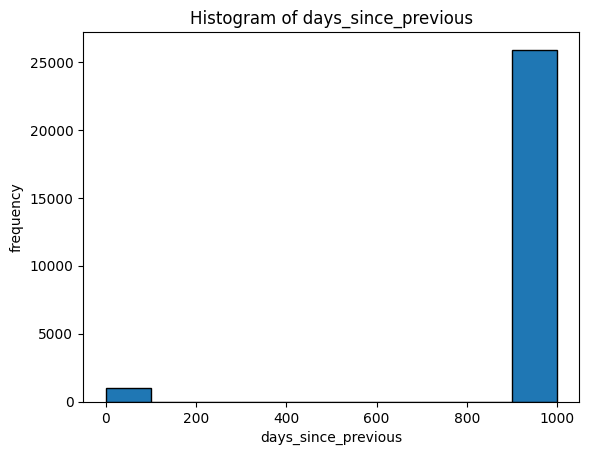

In [10]:
plt.hist(bank_train["days_since_previous"], edgecolor="black")
plt.xlabel("days_since_previous")
plt.ylabel("frequency")
plt.title("Histogram of days_since_previous")

We find that *many* of the values are near 1000 (999 to be exact). After some investigation we discover that 999 was used as a sentinel to indicate that customer had never been contacted.

We will change the value *999* to *NaN*.

In [11]:
bank_train["days_since_previous"] = bank_train["days_since_previous"].replace({999: np.nan})

Text(0.5, 1.0, 'Histogram of days_since_previous')

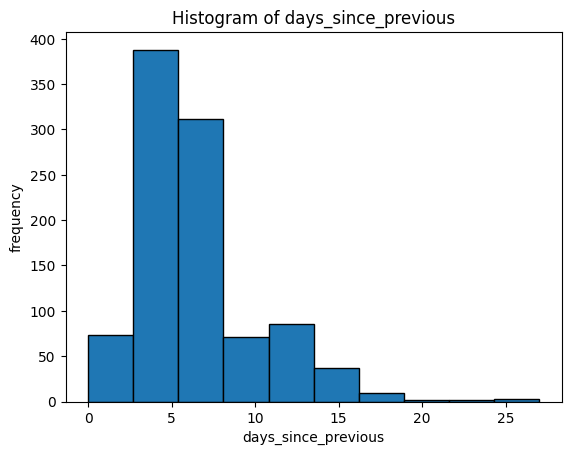

In [12]:
plt.hist(bank_train["days_since_previous"], edgecolor="black")
plt.xlabel("days_since_previous")
plt.ylabel("frequency")
plt.title("Histogram of days_since_previous")

## Re-Expression of Categorical Data as Numeric

Text(0.5, 1.0, 'Barplot of education')

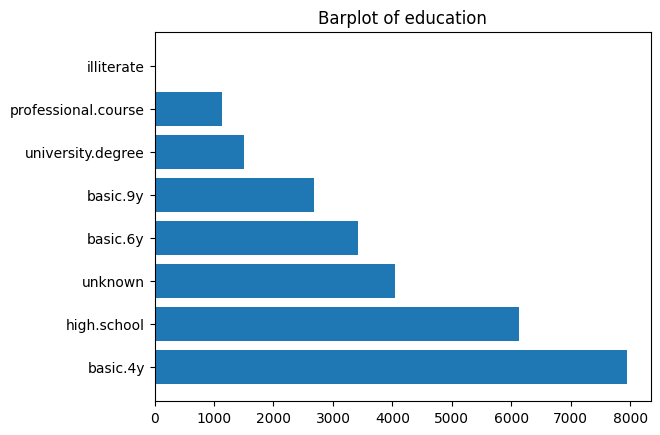

In [24]:
# categories = bank_train["education"].unique()
# values = bank_train["education"].value_counts()
# categories_sorted = [x for _, x in sorted(zip(values, categories), reverse=True)]
# values_sorted = sorted(values, reverse=True)
# plt.barh(categories_sorted, values_sorted)
plt.barh(bank_train["education"].unique(), bank_train["education"].value_counts())
plt.title("Barplot of education")

Because the *education* variable is categorical there is no inherent ordering of the values. In other words, R can't know that *university.degree* represents more education than *basic.4y*. To provide this information to our algorithms we transform the data into numeric values.

| Categorical Value   | Numeric Value |
|---------------------|---------------|
| illiterate          | 0             |
| basic.4y            | 4             |
| basic.6y            | 6             |
| basic.9y            | 9             |
| high.school         | 12            |
| professional.course | 12            |
| university.degree   | 16            |
| unknown             | missing       |